# WeatherPy
----


In [183]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [184]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

coordinates = list(lat_lngs)

# Identify nearest city for each lat, lng combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [185]:
# Creating URL for Weather Map

base_url = 'http://api.openweathermap.org/data/2.5/weather?'


CityList = []


print('Beginning Data Retrieval')
print('-' *50)

record_count = 1
set_count = 1

query_url = base_url + 'APPID=' + weather_api_key + '&units=imperial'

for i, city in enumerate(cities):
    city_url = query_url + '&q=' + city.replace(' ', '+')
    print(f'Processing Record {record_count} of Set {set_count} - {city}')
    record_count +=1

    try: 
        response = requests.get(city_url).json()

        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]       
            
            # Append the City information into city_data list
        CityList.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})

     
    except:
        print('city not found')
        
        pass


print('Data Retrieval Complete')



Beginning Data Retrieval
--------------------------------------------------
Processing Record 1 of Set 1 - tura
Processing Record 2 of Set 1 - kyshtovka
Processing Record 3 of Set 1 - mount gambier
Processing Record 4 of Set 1 - new norfolk
Processing Record 5 of Set 1 - rikitea
Processing Record 6 of Set 1 - mataura
Processing Record 7 of Set 1 - carnarvon
Processing Record 8 of Set 1 - arraial do cabo
Processing Record 9 of Set 1 - saskylakh
Processing Record 10 of Set 1 - junction city
Processing Record 11 of Set 1 - zavetnoye
Processing Record 12 of Set 1 - bredasdorp
Processing Record 13 of Set 1 - madera
Processing Record 14 of Set 1 - hasaki
Processing Record 15 of Set 1 - punta arenas
Processing Record 16 of Set 1 - yulara
Processing Record 17 of Set 1 - albany
Processing Record 18 of Set 1 - kapaa
Processing Record 19 of Set 1 - khani
Processing Record 20 of Set 1 - fare
Processing Record 21 of Set 1 - formoso do araguaia
city not found
Processing Record 22 of Set 1 - georgeto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [186]:
CityList = pd.DataFrame(CityList).sort_index(axis=1)
CityList.to_csv('cities.csv')
CityList

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tura,90,IN,96,25.5198,90.2201,71.91,4.07
1,Kyshtovka,100,RU,81,56.5550,76.6271,47.12,12.86
2,Mount Gambier,100,AU,54,-37.8333,140.7667,56.39,12.17
3,New Norfolk,8,AU,74,-42.7826,147.0587,46.71,1.81
4,Rikitea,0,PF,74,-23.1203,-134.9692,71.67,10.47
...,...,...,...,...,...,...,...,...
560,Kavaratti,100,IN,80,10.5669,72.6420,80.69,9.15
561,Gondanglegi,100,ID,90,-7.7479,112.0132,76.15,10.83
562,Sechura,30,PE,60,-5.5569,-80.8222,74.88,14.74
563,Sidney,75,AU,87,-33.8679,151.2073,57.27,5.75


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [187]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

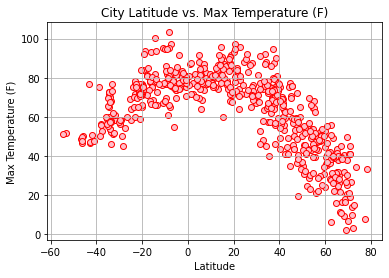

In [188]:
x_values = CityList['Lat']
y_values = CityList['Max Temp']

plt.scatter(x_values, y_values, edgecolors = 'red', color = 'pink')
plt.grid()
plt.title('City Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Save and Show Figure
plt.savefig('CityLatitude_vs_MaxTemperature.png')

This plot is showing city latitude against the maximum temperature.

## Latitude vs. Humidity Plot

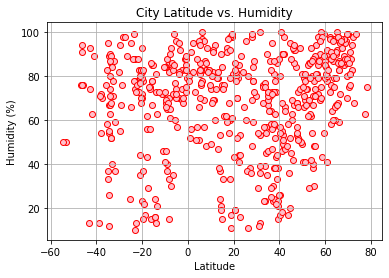

In [189]:
plt.scatter(CityList['Lat'], CityList['Humidity'], color = 'pink', edgecolors ='red')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the Figure
plt.savefig('CityLatitude_vs_Humidity.png')

plt.show()

This plot is showing city latitude against humidity.

## Latitude vs. Cloudiness Plot

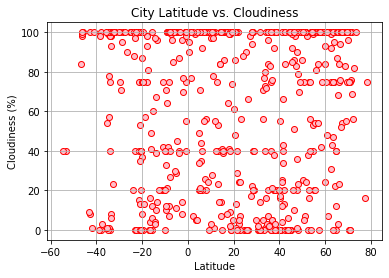

In [190]:
plt.scatter(CityList['Lat'], CityList['Cloudiness'], color = 'pink', edgecolors ='red')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the Figure
plt.savefig('CityLatitude_vs_Cloudiness.png')

plt.show()

This plot is showing city latitude against cloudiness.

## Latitude vs. Wind Speed Plot

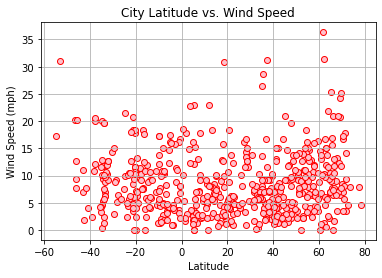

In [191]:
plt.scatter(CityList['Lat'], CityList['Wind Speed'], color = 'pink', edgecolors ='red')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Save the Figure
plt.savefig('CityLatitude_vs_WindSpeed.png')

plt.show()

This plot is showing city latitude against the wind speed.

## Linear Regression

In [192]:
# Create Northern and Southern Hemisphere DataFrames
north = CityList.loc[CityList['Lat'] >= 0]
south = CityList.loc[CityList['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

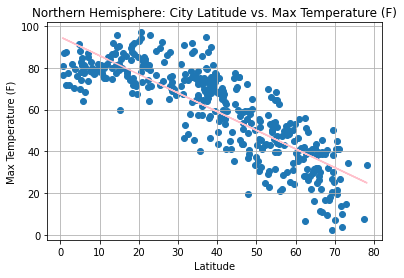

<Figure size 432x288 with 0 Axes>

In [193]:
xval = north['Lat']
yval = north['Max Temp']

linear_regression = linregress(xval,yval)
slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = xval*slope + intercept

plt.scatter(xval, yval)
plt.plot(xval, regress, color='pink')
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(equation, (12,264))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_vs_Max_Temp.png')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

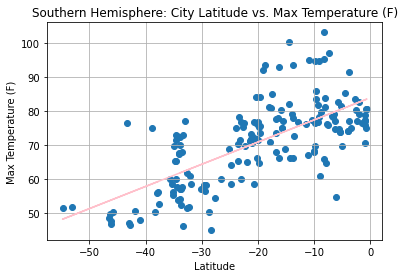

<Figure size 432x288 with 0 Axes>

In [194]:
linear_regression = linregress(south['Lat'], south['Max Temp'])
slope, intercept, rvalue, pvalue, stderr = linregress(south['Lat'], south['Max Temp']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = south['Lat']*slope + intercept

plt.scatter(south['Lat'], south['Max Temp'])
plt.plot(south['Lat'], regress, color='pink')
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(equation, (-47,307))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_vs_Max_Temp.png')

In the northern hemisphere, as the latitude increases, the maximum temperature decreases.
In the southern hemisphere the opposite is happeneing; as the latitude increases so does the maximum temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

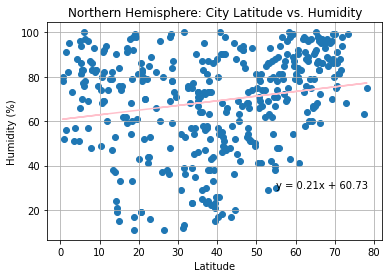

<Figure size 432x288 with 0 Axes>

In [195]:
linear_regression = linregress(north['Lat'], north['Humidity'])
slope, intercept, rvalue, pvalue, stderr = linregress(north['Lat'], north['Humidity']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = north['Lat']*slope + intercept

plt.scatter(north['Lat'], north['Humidity'])
plt.plot(north['Lat'], regress, color='pink')
plt.title('Northern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(equation, (55,30))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_vs_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

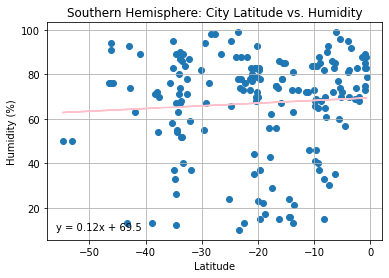

<Figure size 432x288 with 0 Axes>

In [196]:
linear_regression = linregress(south['Lat'], south['Humidity'])
slope, intercept, rvalue, pvalue, stderr = linregress(south['Lat'], south['Humidity']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = south['Lat']*slope + intercept

plt.scatter(south['Lat'], south['Humidity'])
plt.plot(south['Lat'], regress, color='pink')
plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(equation, (-56,10))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_vs_Humidity.png')

In both the northern hemisphere and the southern hemisphere, there is only a slight positive correlation between increasing latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

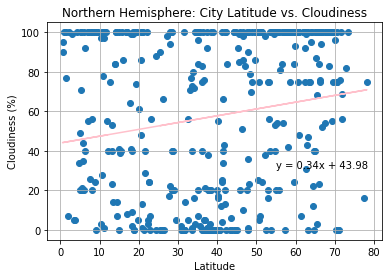

<Figure size 432x288 with 0 Axes>

In [197]:
linear_regression = linregress(north['Lat'], north['Cloudiness'])
slope, intercept, rvalue, pvalue, stderr = linregress(north['Lat'], north['Cloudiness']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = north['Lat']*slope + intercept

plt.scatter(north['Lat'], north['Cloudiness'])
plt.plot(north['Lat'], regress, color='pink')
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(equation, (55,31))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_vs_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

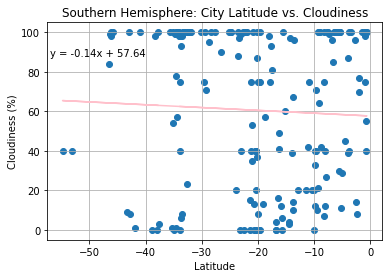

<Figure size 432x288 with 0 Axes>

In [198]:
linear_regression = linregress(south['Lat'], south['Cloudiness'])
slope, intercept, rvalue, pvalue, stderr = linregress(south['Lat'], south['Cloudiness']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = south['Lat']*slope + intercept

plt.scatter(south['Lat'], south['Cloudiness'])
plt.plot(south['Lat'], regress, color='pink')
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(equation, (-57,88))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_vs_Cloudiness.png')

In both the northern hemisphere and the southern hemisphere, there is a slight positive correlation between increasing latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

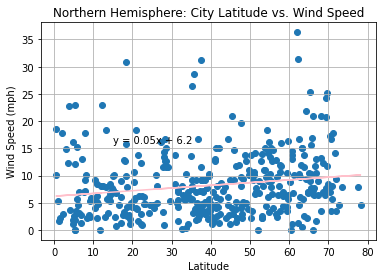

<Figure size 432x288 with 0 Axes>

In [199]:
linear_regression = linregress(north['Lat'], north['Wind Speed'])
slope, intercept, rvalue, pvalue, stderr = linregress(north['Lat'], north['Wind Speed']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = north['Lat']*slope + intercept

plt.scatter(north['Lat'], north['Wind Speed'])
plt.plot(north['Lat'], regress, color='pink')
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(equation, (15,16))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_vs_Wind_Speed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

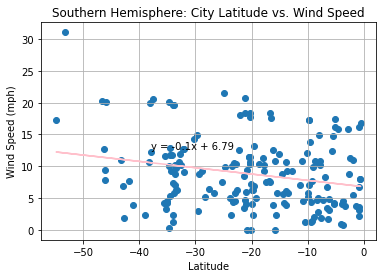

<Figure size 432x288 with 0 Axes>

In [200]:
linear_regression = linregress(south['Lat'], south['Wind Speed'])
slope, intercept, rvalue, pvalue, stderr = linregress(south['Lat'], south['Wind Speed']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = south['Lat']*slope + intercept

plt.scatter(south['Lat'], south['Wind Speed'])
plt.plot(south['Lat'], regress, color='pink')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(equation, (-38,12.7))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_vs_Wind_Speed.png')

In the northern hemisphere, there is a slight positive correlation between wind speed and latitude whereas in the southern hemisphere, there is a slight negative correlation between wind speed as increasing latitude.